In [3]:
import tensorflow as tf
import os



In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score
#from keras.utils import np_utils

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
import cv2 as cv
import imghdr

# Cleaning the data 

In [5]:
data_dir = 'data' 
image_ext = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Issue with image data\cartoon\0924a7ef295741e916c8f42512bbe5bd.jpg
Issue with image data\cartoon\1486126267-mickey-mouse.jpg
Issue with image data\cartoon\1650946845_original.jpg
Issue with image data\cartoon\1d2828ce_1662965935230_sc.jpeg
Issue with image data\cartoon\20220408_172035_0000-1.jpg
Issue with image data\cartoon\360_F_100245666_Seo23s3Fnw6XihC1fkW8PxF7SKfQRsaj.jpg
Issue with image data\cartoon\3ea947c7c2ae57d763a9442fee8f1f2a.jpg
Issue with image data\cartoon\42a77d16db93acb48fc7d0b7cc2f9a55.jpg
Issue with image data\cartoon\5081f28733ce69397d496a2dfdcedc2d.jpeg
Issue with image data\cartoon\51DwGfBvcBL._AC_UF8941000_QL80_.jpg
Issue with image data\cartoon\51My-XLENgL._AC_UF8941000_QL80_.jpg
Issue with image data\cartoon\54384b5fd4634be174c409ecf47a38be.jpeg
Issue with image data\cartoon\61AbHD-RGtL._AC_UF10001000_QL80_.jpg
Issue with image data\cartoon\61EfaqShFmL._AC_UF10001000_QL80_.jpg
Issue with image data\cartoon\61ewR1JDGQL._AC_UF10001000_QL80_.jpg
Issue with image 

In [7]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 681 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()

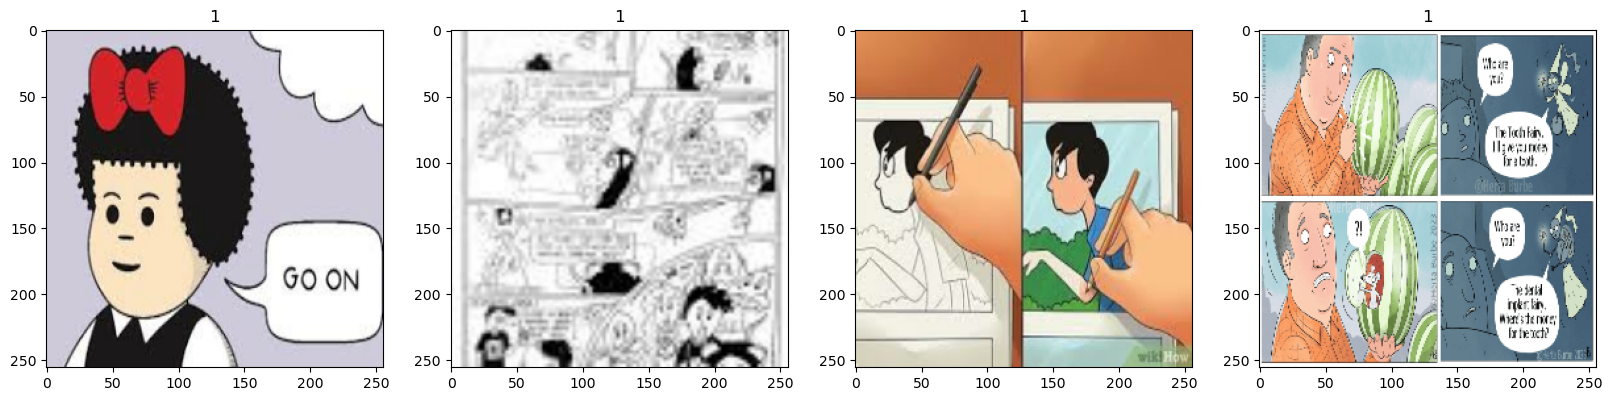

In [10]:
#1 is comics
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
scaled_data= data.map(lambda x,y: (x/255, y))

In [11]:
scaled_data.as_numpy_iterator().next()

(array([[[[0.7019608 , 0.7019608 , 0.7019608 ],
          [0.7019608 , 0.7019608 , 0.7019608 ],
          [0.7019608 , 0.7019608 , 0.7019608 ],
          ...,
          [0.6756434 , 0.6756434 , 0.6756434 ],
          [0.6618566 , 0.6618566 , 0.6618566 ],
          [0.65882355, 0.65882355, 0.65882355]],
 
         [[0.7268995 , 0.7268995 , 0.7268995 ],
          [0.7268995 , 0.7268995 , 0.7268995 ],
          [0.7268995 , 0.7268995 , 0.7268995 ],
          ...,
          [0.70335716, 0.70335716, 0.70335716],
          [0.69088686, 0.69088686, 0.69088686],
          [0.6881434 , 0.6881434 , 0.6881434 ]],
 
         [[0.84025735, 0.84025735, 0.84025735],
          [0.84025735, 0.84025735, 0.84025735],
          [0.84025735, 0.84025735, 0.84025735],
          ...,
          [0.82932895, 0.82932895, 0.82932895],
          [0.8228425 , 0.8228425 , 0.8228425 ],
          [0.8214154 , 0.8214154 , 0.8214154 ]],
 
         ...,
 
         [[0.84528184, 0.84528184, 0.84528184],
          [0.84544

In [11]:
train_size = int(len(scaled_data)*.7)
val_size = int(len(scaled_data)*.2)
test_size = int(len(scaled_data)*.1)

In [12]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# Model


In [13]:
model = Sequential()

In [14]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [17]:
hist= model.fit(train, epochs=20, validation_data=val)

Epoch 1/20


15/15 [==============================] - 6s 332ms/step - loss: 138.3623 - accuracy: 0.4917 - val_loss: 0.4326 - val_accuracy: 0.8594
Epoch 2/20
15/15 [==============================] - 6s 330ms/step - loss: 0.5970 - accuracy: 0.6792 - val_loss: 0.4029 - val_accuracy: 0.8594
Epoch 3/20
15/15 [==============================] - 6s 341ms/step - loss: 0.3993 - accuracy: 0.8292 - val_loss: 0.2152 - val_accuracy: 0.9297
Epoch 4/20
15/15 [==============================] - 5s 319ms/step - loss: 0.2222 - accuracy: 0.9167 - val_loss: 0.1664 - val_accuracy: 0.9453
Epoch 5/20
15/15 [==============================] - 5s 317ms/step - loss: 0.1046 - accuracy: 0.9792 - val_loss: 0.1434 - val_accuracy: 0.9609
Epoch 6/20
15/15 [==============================] - 5s 307ms/step - loss: 0.0719 - accuracy: 0.9875 - val_loss: 0.0484 - val_accuracy: 0.9844
Epoch 7/20
15/15 [==============================] - 5s 312ms/step - loss: 0.0319 - accuracy: 0.9937 - val_loss: 0.0549 - val_accuracy: 0.9844
Ep

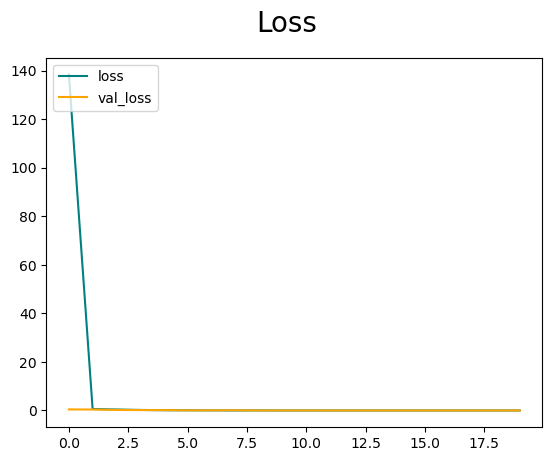

In [18]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluating 

In [19]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [20]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [21]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 62ms/step


In [22]:
print(pre.result(),re.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [23]:
print("Accuracy is",acc.result().numpy())

Accuracy is 1.0


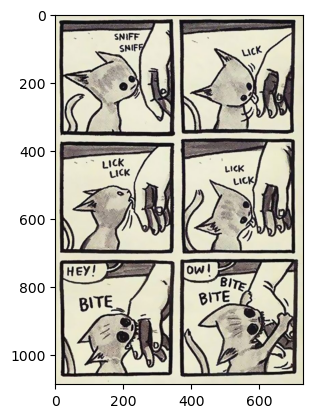

In [24]:
img=cv.imread('comic2.jpg')
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))
plt.show()

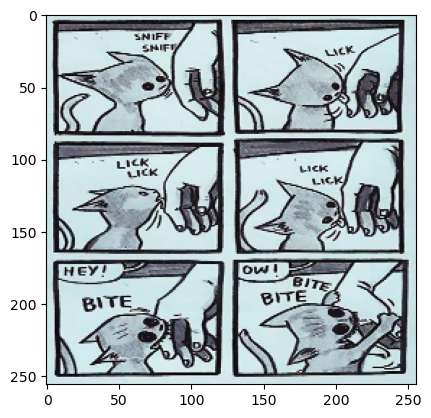

In [25]:
new_image=tf.image.resize(img,(256,256))
plt.imshow(new_image.numpy().astype(int))
plt.show()

In [26]:
pred=model.predict(np.expand_dims(new_image/255,0))

1/1 [==============================] - 0s 59ms/step


In [27]:
pred

array([[0.61871153]], dtype=float32)

In [28]:
if pred > 0.5: 
    print('Predicted class is Comic')
else:
    print('Predicted class is Cartoon')

Predicted class is Comic


# Thank YOU! 